In [231]:
from src.catching import attempt_catch
from src.pokemon import PokemonFactory, StatusEffect
import matplotlib.pyplot as plt
import numpy as np

In [232]:
factory = PokemonFactory("pokemon.json")

In [233]:
jolteon = factory.create("jolteon", 100, StatusEffect.NONE, 1)
caterpie = factory.create("caterpie", 100, StatusEffect.NONE, 1)
snorlax = factory.create("snorlax", 100, StatusEffect.NONE, 1)
onix = factory.create("onix", 100, StatusEffect.NONE, 1)
mewtwo = factory.create("mewtwo", 100, StatusEffect.NONE, 1)

In [234]:


successPokeBall = [0, 0, 0, 0, 0]
successUltraBall = [0, 0, 0, 0, 0]
successFastBall = [0, 0, 0, 0, 0]
successHeavyBall = [0, 0, 0, 0, 0]

In [235]:
for _ in range(10000):
    for index, pokemon in enumerate([jolteon, caterpie, snorlax, onix, mewtwo]):
        if attempt_catch(pokemon, "pokeball")[0]:
            successPokeBall[index]+=1
        if attempt_catch(pokemon, "ultraball")[0]:
            successUltraBall[index]+=1
        if attempt_catch(pokemon, "fastball")[0]:
            successFastBall[index]+=1
        if attempt_catch(pokemon, "heavyball")[0]:
            successHeavyBall[index]+=1




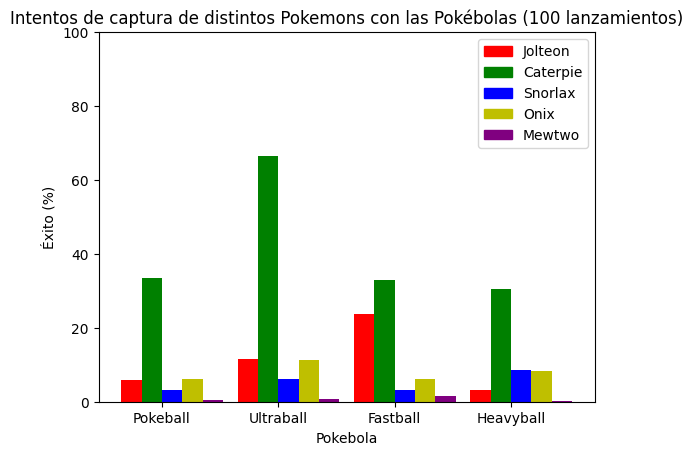

In [236]:
data = [successPokeBall, successUltraBall, successFastBall, successHeavyBall]

fig, ax = plt.subplots()
bar_width = 0.175
bar_positions = np.arange(len(data))

max_length = max(len(sublist) for sublist in data)

for i, (label, color) in enumerate(zip(["Jolteon", "Caterpie", "Snorlax", "Onix", "Mewtwo"], ['r', 'g', 'b', 'y', 'purple'])):
    success_data = [sublist[i]*100/10000 if i < len(sublist) else 0 for sublist in data]
    ax.bar(
        bar_positions + i * bar_width,
        success_data,
        width=bar_width,
        label=label,
        color=color
    )

# Configurar el gráfico
ax.set_xlabel("Pokebola")
ax.set_ylabel("Éxito (%)")
ax.set_title("Intentos de captura de distintos Pokemons con las Pokébolas (100 lanzamientos)")
ax.set_xticks([pos + bar_width * 1.5 for pos in bar_positions])
ax.set_xticklabels(["Pokeball", "Ultraball", "Fastball", "Heavyball"])

# Crear leyendas fuera del bucle para evitar repeticiones
labels = ["Jolteon", "Caterpie", "Snorlax", "Onix", "Mewtwo"]
handles = [plt.Rectangle((0,0),1,1, color='r'), plt.Rectangle((0,0),1,1, color='g'), plt.Rectangle((0,0),1,1, color='b'), plt.Rectangle((0,0),1,1, color='y'), plt.Rectangle((0,0),1,1, color='purple')]
ax.legend(handles, labels)

# Mostrar el gráfico
plt.ylim(0, 100)
plt.show()

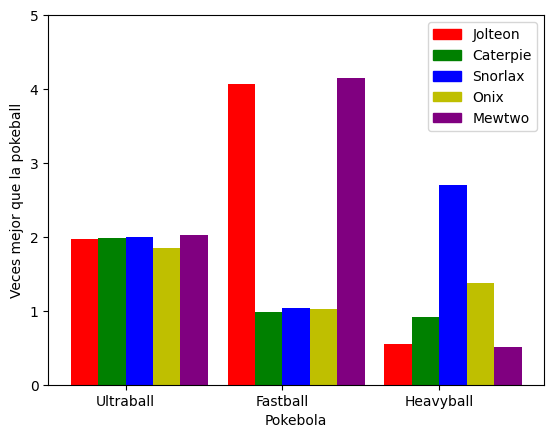

In [237]:
# Para calcular esto vamos a sacar de la cuenta el factor pokebola clasica
data = [successUltraBall, successFastBall, successHeavyBall]

fig, ax = plt.subplots()
bar_width = 0.175
bar_positions = np.arange(len(data))

max_length = max(len(sublist) for sublist in data)

for i, (label, color) in enumerate(zip(["Jolteon", "Caterpie", "Snorlax", "Onix", "Mewtwo"], ['r', 'g', 'b', 'y', 'purple'])):
    success_data = [sublist[i] if i < len(sublist) else 0 for sublist in data]
    success_data[:] = [x / successPokeBall[i] for x in success_data]
    ax.bar(
        bar_positions + i * bar_width,
        success_data,
        width=bar_width,
        label=label,
        color=color
    )

# Configurar el gráfico
ax.set_xlabel("Pokebola")
ax.set_ylabel("Veces mejor que la pokeball")
ax.set_xticks([pos + bar_width * 1.5 for pos in bar_positions])
ax.set_xticklabels(["Ultraball", "Fastball", "Heavyball"])

# Crear leyendas fuera del bucle para evitar repeticiones
labels = ["Jolteon", "Caterpie", "Snorlax", "Onix", "Mewtwo"]
handles = [plt.Rectangle((0,0),1,1, color='r'), plt.Rectangle((0,0),1,1, color='g'), plt.Rectangle((0,0),1,1, color='b'), plt.Rectangle((0,0),1,1, color='y'), plt.Rectangle((0,0),1,1, color='purple')]
ax.legend(handles, labels)

# Mostrar el gráfico
plt.ylim(0, 5)
plt.show()

Ej 2

In [238]:
#¿Las condiciones de salud tienen algun efecto sobre la efectividad
# de la captura? Si es ası, ¿Cual es mas o menos efectiva?

In [239]:

# Assuming `attempt_catch` and `factory` functions are defined elsewhere

# times = 1000
# pokeball = "ultraball"
# 
# health_range = np.linspace(0, 1, times)  # Normalized health values
# 
# # Create empty lists to store catch rates at each health level
# jolteon_catch_rate = [0] * times
# caterpie_catch_rate = [0] * times
# snorlax_catch_rate = [0] * times
# onix_catch_rate = [0] * times
# mewtwo_catch_rate = [0] * times
# 
# # Simulate catching attempts for each Pokemon at different health levels
# for vida in range(times):
#     jolteon = factory.create("jolteon", 100, StatusEffect.NONE, vida / times)
#     caterpie = factory.create("caterpie", 100, StatusEffect.NONE, vida / times)
#     snorlax = factory.create("snorlax", 100, StatusEffect.NONE, vida / times)
#     onix = factory.create("onix", 100, StatusEffect.NONE, vida / times)
#     mewtwo = factory.create("mewtwo", 100, StatusEffect.NONE, vida / times)
# 
#     for _ in range(times):
#         jolteon_catch_rate[vida] += attempt_catch(jolteon, pokeball)[0]
#         caterpie_catch_rate[vida] += attempt_catch(caterpie, pokeball)[0]
#         snorlax_catch_rate[vida] += attempt_catch(snorlax, pokeball)[0]
#         onix_catch_rate[vida] += attempt_catch(onix, pokeball)[0]
#         mewtwo_catch_rate[vida] += attempt_catch(mewtwo, pokeball)[0]
# 
# # Calculate linear regression lines for each Pokemon
# jolteon_m, jolteon_b = np.polyfit(health_range, jolteon_catch_rate, 1)
# caterpie_m, caterpie_b = np.polyfit(health_range, caterpie_catch_rate, 1)
# snorlax_m, snorlax_b = np.polyfit(health_range, snorlax_catch_rate, 1)
# onix_m, onix_b = np.polyfit(health_range, onix_catch_rate, 1)
# mewtwo_m, mewtwo_b = np.polyfit(health_range, mewtwo_catch_rate, 1)
# 
# # Generate smoother x-axis points for the fitted lines
# x_smooth = np.linspace(min(health_range), max(health_range), 100)
# 
# # Calculate fitted line y-values for each Pokemon
# jolteon_fitted = jolteon_m * x_smooth + jolteon_b
# caterpie_fitted = caterpie_m * x_smooth + caterpie_b
# snorlax_fitted = snorlax_m * x_smooth + snorlax_b
# onix_fitted = onix_m * x_smooth + onix_b
# mewtwo_fitted = mewtwo_m * x_smooth + mewtwo_b
# 
# # Create the plot
# plt.figure(figsize=(10, 6))  # Adjust figure size for better readability
# 
# # Scatter plots with markers for each Pokemon's catch rate
# plt.scatter(health_range, jolteon_catch_rate, label='Jolteon', marker='o', color='red')
# plt.scatter(health_range, caterpie_catch_rate, label='Caterpie', marker='o', color='green')
# plt.scatter(health_range, snorlax_catch_rate, label='Snorlax', marker='o', color='blue')
# plt.scatter(health_range, onix_catch_rate, label='Onix', marker='o', color='purple')
# plt.scatter(health_range, mewtwo_catch_rate, label='Mewtwo', marker='o', color='orange')
# 
# # Plot the fitted lines for each Pokemon
# plt.plot(x_smooth, jolteon_fitted, label='Jolteon (Fitted)', color='red', linestyle='-')
# plt.plot(x_smooth, caterpie_fitted, label='Caterpie (Fitted)', color='green', linestyle='-')
# plt.plot(x_smooth, snorlax_fitted, label='Snorlax (Fitted)', color='blue', linestyle='-')
# plt.plot(x_smooth, onix_fitted, label='Onix (Fitted)', color='purple', linestyle='-')
# plt.plot(x_smooth, mewtwo_fitted, label='Mewtwo (Fitted)', color='orange', linestyle='-')
# 
# # Set labels and title for the plot
# plt.xlabel("Normalized Health")
# plt.ylabel("Catch Rate (Times Caught)")
# plt.title("Catch Rate vs. Normalized Health (Pokeball)")
# 
# # Add legend
# plt.legend()
# 
# # Adjust x and y axis limits for better visualization
# plt.xlim(0, 1)  # Set x-axis limits from 0 to 1 (normalized health range)
# plt.ylim(0, times)  # Adjust y-axis limit based on the maximum catch rate (times)
# 
# # Show the plot
# plt.grid(True)
# plt.show()

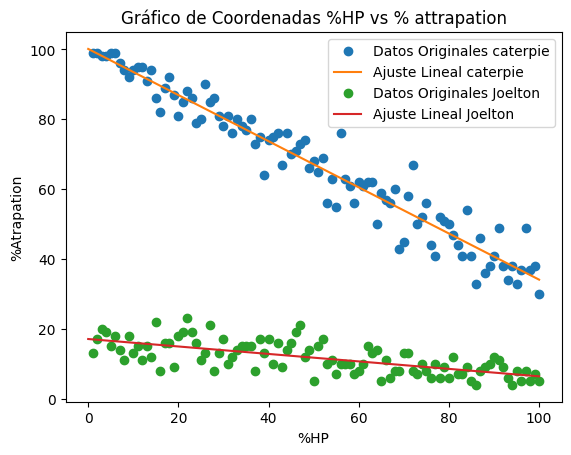

In [240]:
# la idea va a ser la siguiente: 
# Vamos a tomar a un pokemon, y por cada %HP vamos a tirar 100 intentos de captura de la pokebola
# com eso vamos a sacar la probabilidad de captura para cada HP. Con eso vamos a imprimir todos esos puntos en un grafico donde 

#x es la coordenada que va de 0 a 100 HP
#y es la coordenada que va de 0% a 100%

pokebol = "pokeball"
caterpiePoints = []
joeltonPoints = []

for hp_percentage in range(1, 101):
    caterpie = factory.create("caterpie", 100, StatusEffect.NONE, hp_percentage*0.01)
    joelton = factory.create("jolteon", 100, StatusEffect.NONE, hp_percentage*0.01)
    catchRateCaterpie = 0
    catchRateJoelton = 0
    for i in range(0, 100):
        catchRateCaterpie += attempt_catch(caterpie, pokebol)[0]
        catchRateJoelton += attempt_catch(joelton, pokebol)[0]
    caterpiePoints.append(catchRateCaterpie)
    joeltonPoints.append(catchRateJoelton)
    

xCaterpie = np.array(list(range(1, 101)))
yCaterpie = np.array(caterpiePoints)

coefficientsCaterpie = np.polyfit(xCaterpie, yCaterpie, 1)
polyCaterpie = np.poly1d(coefficientsCaterpie)

x_fit_caterpie = np.linspace(0, 100, 100)
y_fit_caterpie = polyCaterpie(x_fit_caterpie)

xJoelton = np.array(list(range(1, 101)))
yJoelton = np.array(joeltonPoints)


coefficientsJoelton = np.polyfit(xJoelton, yJoelton, 1)
polyJoelton = np.poly1d(coefficientsJoelton)

x_fit_joelton = np.linspace(0, 100, 100)
y_fit_joelton = polyJoelton(x_fit_joelton)



plt.plot(xCaterpie, yCaterpie, 'o', label='Datos Originales caterpie')
plt.plot(x_fit_caterpie, y_fit_caterpie, '-', label='Ajuste Lineal caterpie')

plt.plot(xJoelton, yJoelton, 'o', label='Datos Originales Joelton')
plt.plot(x_fit_joelton, y_fit_joelton, '-', label='Ajuste Lineal Joelton')


plt.title('Gráfico de Coordenadas %HP vs % attrapation')
plt.xlabel('%HP')
plt.ylabel('%Atrapation')
plt.legend()
plt.show()

Aca podemos ver las probabilidades de atrape segun el nivel de HP.
Se puede ver que los puntos generan una funcion lineal decreciente. Es decir, a medida de que sube el HP, baja la probabilidad de captura 

EN caterpie es super evidente, mientras que en Joelton de por si la probabilidad de captura es baja, y a medida de que sube el HP se convierte casi en imposible de capturar
